In [2]:
# Exploratory Data Analysis using Python- A case study
# Introduction:-
'''We will use StackOverflow developer survay dataset for our analysis. This is an annual survey conducted by StatckOverflow
and you can find the row data and result hear: https://insights.stackoverflow.com/survey. Download the CSV anmd upload it'''
# Use urlretrieve function from urllib.request to download csv file from a row URL directry.
# Use a helper library e.g. opendatasets ,which contains a collection of curated datasets and provides a function for directly download.

'We will use StackOverflow developer survay dataset for our analysis. This is an annual survey conducted by StatckOverflow\nand you can find the row data and result hear: https://insights.stackoverflow.com/survey. Download the CSV anmd upload it'

In [3]:
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od
# od.download('stack-overflow-developer-survey-2023')

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as srn
import os
os.listdir('stack-overflow-developer-survey-2020')
'''README_2023.txt- Containing information about dataset.
   survey_result_schema.csv- Containing the list of questions and the sort codes for each question.
   survey_results_public.csv- Containing the full list of response to the questions'''

'README_2023.txt- Containing information about dataset.\n   survey_result_schema.csv- Containing the list of questions and the sort codes for each question.\n   survey_results_public.csv- Containing the full list of response to the questions'

In [19]:
survey_raw=pd.read_csv('/content/stack-overflow-developer-survey-2020/survey_results_public.csv')
print(survey_raw)

       Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode Comp

In [28]:
''' The dataset contain over 89184 responses to 78 questions.The responses have been anonymized and there's no personally
identifiable information available to us- although each respondent has been assigned a randomized respondent ID.'''
survey_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [23]:
survey_schema='/content/stack-overflow-developer-survey-2020/survey_results_schema.csv'
schema_raw=pd.read_csv(survey_schema, index_col='Column').QuestionText

In [24]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [25]:
type(schema_raw)

pandas.core.series.Series

In [26]:
schema_raw['YearsCode']

'Including any education, how many years have you been coding in total?'

In [33]:
# Data Preparation and Cleaning: While the survey responces contain a wealth of information, we will limit our analysis to following areas.
# Demographics of the survey respondent and the global programming community.
# Distribution of programming skills, experience and preferences.
# Employment- related information, preferences and opinions.
# Let's select a subset of columns with the relevent data for our analysis
select_columns=[# Demographics
                'Country','Age','Gender','EdLevel','UndergradMajor',
                # Programming experience
                'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
                # Employment
                'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt']

In [34]:
len(select_columns)

20

In [36]:
''' Let's extract a copy of the data from these columns into a new data frame survey_data,
Which we can continue to modify further without affecting the original data frame '''
survey_data=survey_raw[select_columns].copy()
schema=schema_raw[select_columns]

In [37]:
# View some basic information about the data frame
survey_data.shape

(64461, 20)

In [51]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [39]:
schema.shape

(20,)

In [40]:
schema.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, Country to NEWEdImpt
Series name: QuestionText
Non-Null Count  Dtype 
--------------  ----- 
20 non-null     object
dtypes: object(1)
memory usage: 876.0+ bytes


In [41]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [42]:
survey_data['Age1stCode']

0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object

In [45]:
survey_data.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [50]:
'''Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN'''
survey_data['Age1stCode']=pd.to_numeric(survey_data.Age1stCode, errors='coerce')
survey_data['YearsCode']=pd.to_numeric(survey_data.YearsCode, errors='coerce')
survey_data['YearsCodePro']=pd.to_numeric(survey_data.YearsCodePro, errors='coerce')

In [49]:
# Some basics statistics about the numeric columns.
survey_data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [53]:
'''There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279.
This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding.
A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.
We can do this using the .drop method'''
survey_data.drop(survey_data[survey_data.Age < 10].index, inplace=True)
survey_data.drop(survey_data[survey_data.Age > 100].index, inplace=True)

In [54]:
# Same hold true for WorkWeekHrs. Let's ignore entries where the value for the column is higher then 140 hour,(~20 hours oer day)
survey_data.drop(survey_data[survey_data.WorkWeekHrs > 140].index, inplace=True)

In [55]:
# The gender column also allowed picking multiple options but to simplify our analysis, we'll remove values containing more option.
survey_data['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [56]:
survey_data.where(~(survey_data.Gender.str.contains(';', na=False)),np.nan,inplace=True)

In [58]:
# Now cleaned up and prepared the dataset for analysis.
survey_data.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
49162,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,12.0,7.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,C#;Go;Haskell;HTML/CSS;JavaScript;Kotlin;Pytho...,Every few months,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Slightly satisfied,Industry that I’d be working in;Remote work op...,Occasionally: 1-2 days per quarter but less th...,Very important
25578,Norway,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,13.0,6.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;Java;Java...,Assembly;Bash/Shell/PowerShell;C;C++;Go;Java;P...,Once a year,Play games;Visit Stack Overflow;Panic;Watch he...,"Not employed, but looking for work","Developer, back-end;Developer, embedded applic...",NaN,NaN,Industry that I’d be working in;How widely use...,NaN,NaN
57216,Turkey,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,12.0,6.0,1.0,C#;HTML/CSS;Java;JavaScript;Python;SQL,C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;Pytho...,Every few months,Play games;Call a coworker or friend;Visit Sta...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",16.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
492,Italy,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,15.0,2.0,NaN,C++;HTML/CSS;JavaScript;Python,Assembly;C;Java;VBA,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
63798,Uzbekistan,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript;TypeScript,Every few months,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
17387,Colombia,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,15.0,4.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end",40.0,Very dissatisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Critically important
4277,Australia,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,15.0,22.0,15.0,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript;VBA,C#;HTML/CSS;JavaScript;Python;Scala;SQL;TypeSc...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Slightly satisfied,How widely used or impactful my work output wo...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
44485,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,22.0,9.0,9.0,Bash/Shell/PowerShell;C++;Dart;HTML/CSS;Java;J...,Bash/Shell/PowerShell;Dart;HTML/CSS;Java;JavaS...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Data scientist or mac...,NaN,Very satisfied,NaN,NaN,Somewhat important
16546,Belarus,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,25.0,2.0,2.0,HTML/CSS;Java;JavaScript;PHP,Dart;HTML/CSS;JavaScript;Kotlin;PHP;TypeScript,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",9.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologi

In [91]:
# Exploratory Data Analysis: Before we can ask intresting question about the survey responses. it would help to understand
# what the demographics i.e. country,age,gender,education,employment level.
# Country
srn.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='white'

In [71]:
survey_data.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [72]:
# We can identify the countries with highest number of respondents using the value_counts method.
top_countries=survey_data.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<Axes: ylabel='Country'>

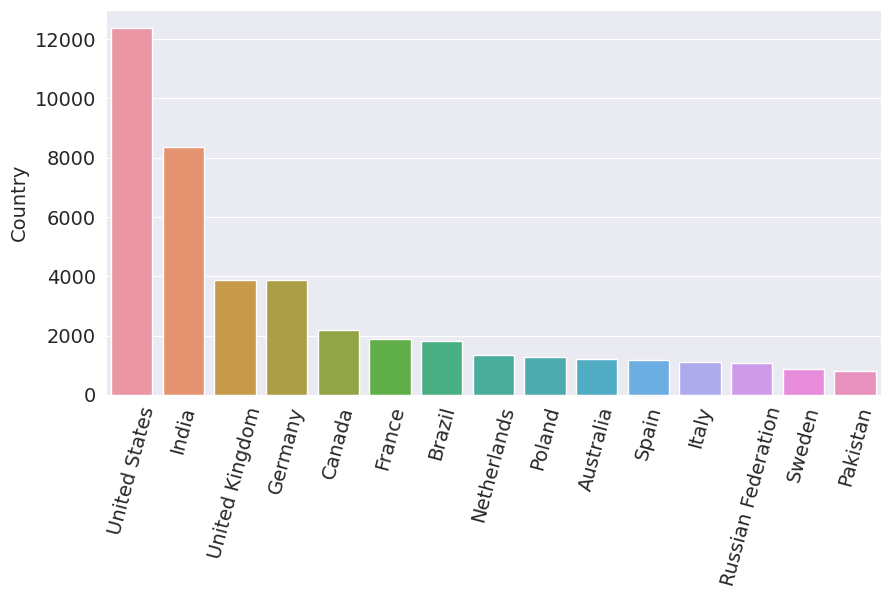

In [92]:
# We can visualize this information using a bar chart
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
srn.barplot(x=top_countries.index,y=top_countries)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.


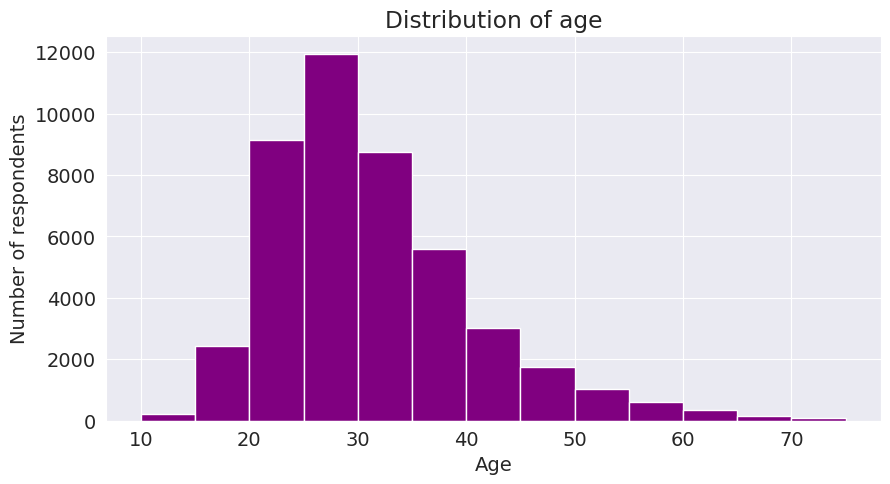

In [93]:
# Age: The distribution of the age of respondents is another important factor to looks at, and we can usea histogram to visualize it.
plt.figure(figsize=(10,5))
plt.title('Distribution of age')
plt.xlabel("Age")
plt.ylabel("Number of respondents")
plt.hist(survey_data.Age,bins=np.arange(10,80,5),color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.


Gender:

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [79]:
gender_counts=survey_data.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A Pie chart would be a good way to visualize the distribution.

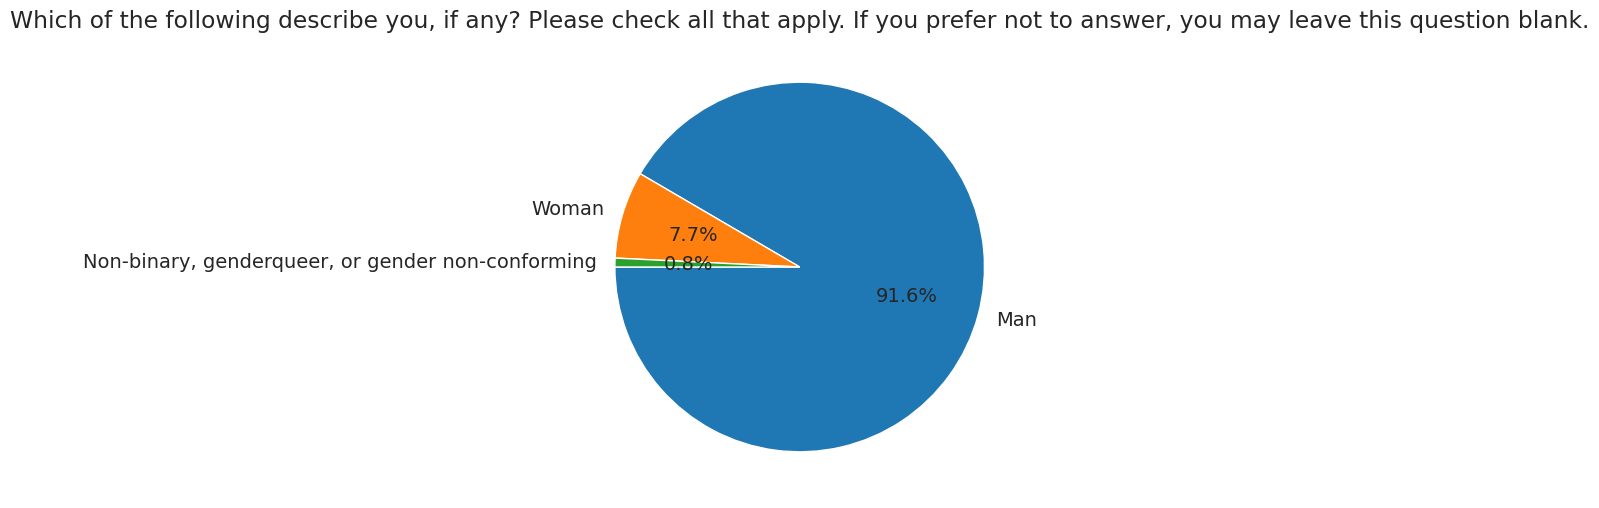

In [94]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

Education Level:-

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [85]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [86]:
survey_data.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

Text(0, 0.5, '')

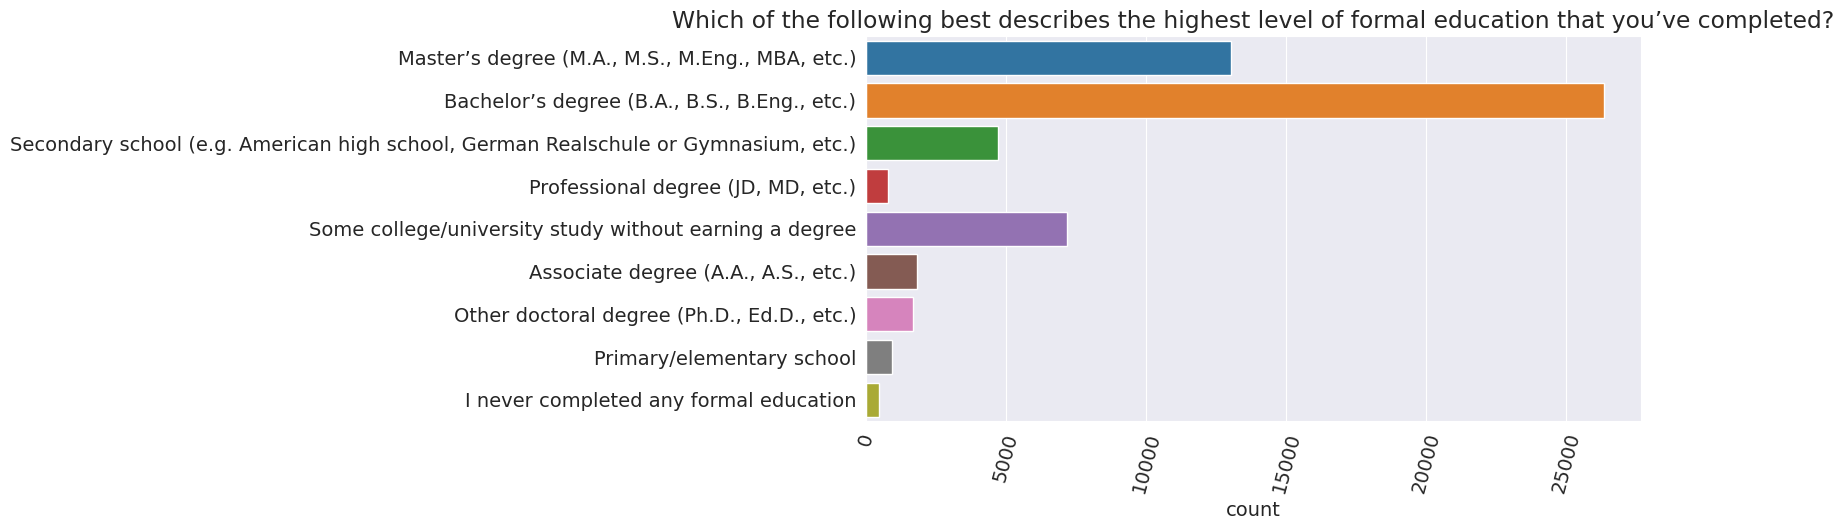

In [109]:
plt.figure(figsize=(10,5))
srn.countplot(y=survey_data.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel)
plt.ylabel(None)

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.


Exercises:
 The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women.


Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [100]:
undergrad_pct=survey_data.UndergradMajor.value_counts()*100/survey_data.UndergradMajor.count()
undergrad_pct

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

Text(0, 0.5, '')

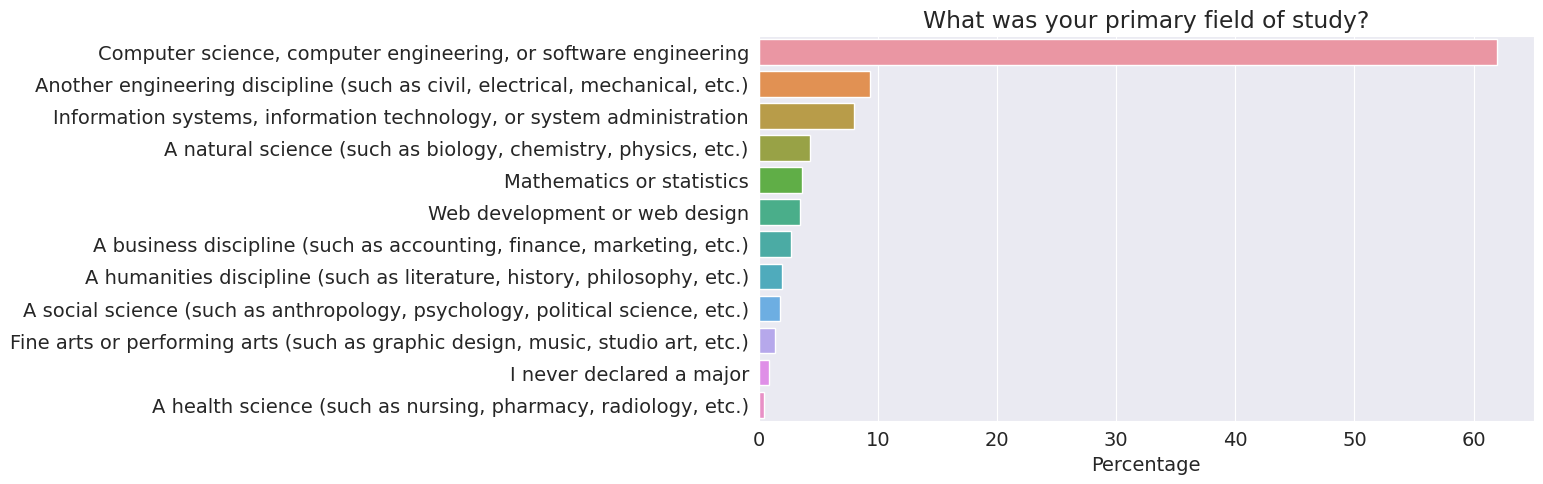

In [110]:
plt.figure(figsize=(10,5))
srn.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel("Percentage")
plt.ylabel(None)

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.


Exercises: Analyze the NEWEdImpt column for respondents who hold some college degree vs. those who don't. Do you notice any difference in opinion?

Employment:

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.

In [104]:
schema.Employment

'Which of the following best describes your current employment status?'

In [105]:
survey_data.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

Text(0.5, 0, 'Percentage')

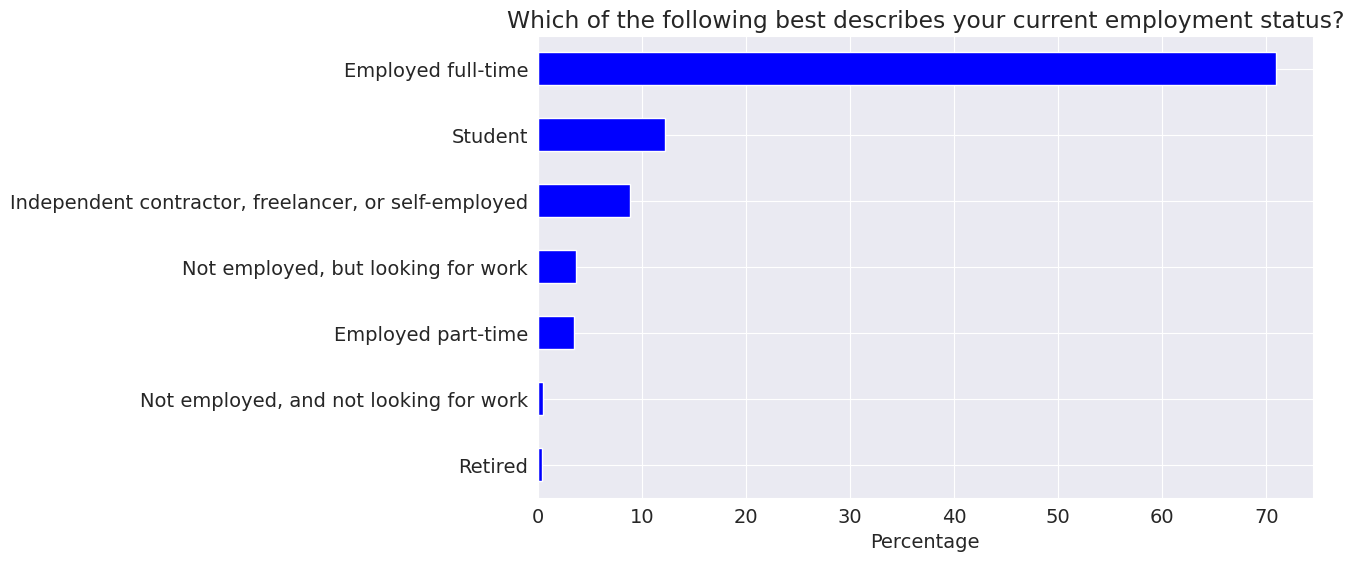

In [114]:
(survey_data.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='b')
plt.title(schema.Employment)
plt.xlabel('Percentage')

It appears that close to 10% of respondents are employed part time or as freelancers.


Exercise:
Add a new column EmploymentType containing the values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired). For each of the graphs that follow, show a comparison between Enthusiast and Professional.


The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [115]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [117]:
survey_data.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               